In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [86]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv',delim_whitespace = True, names = col_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


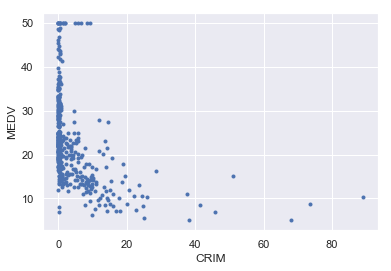

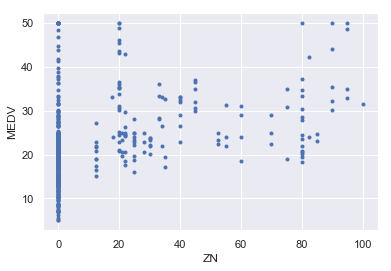

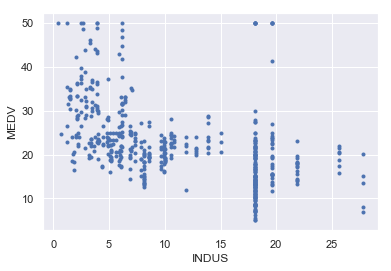

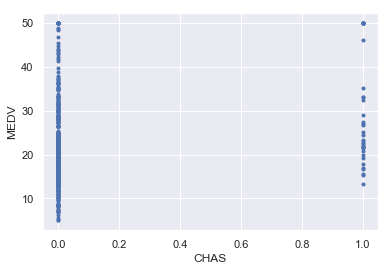

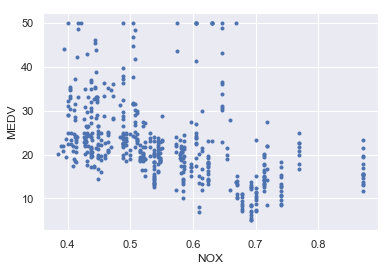

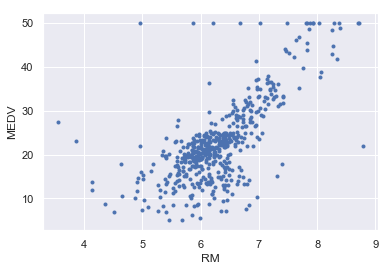

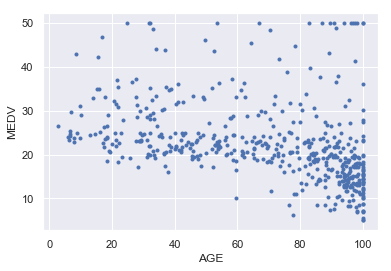

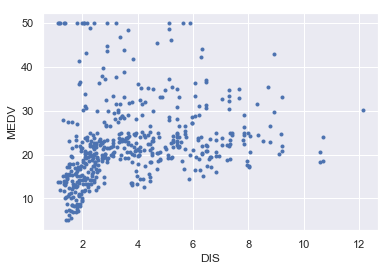

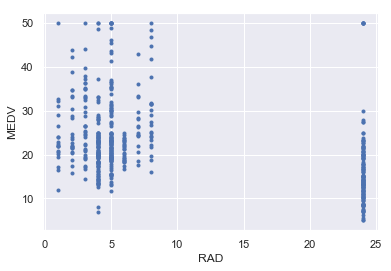

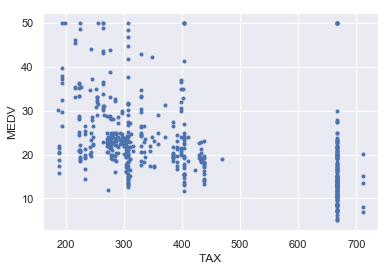

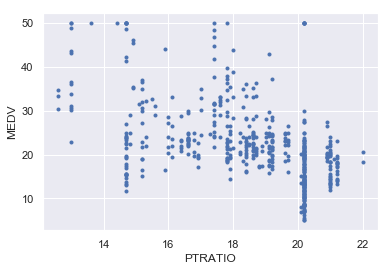

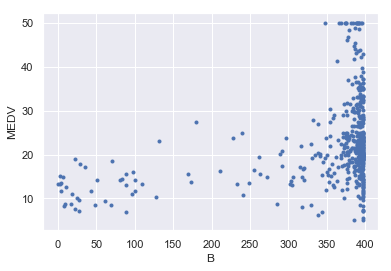

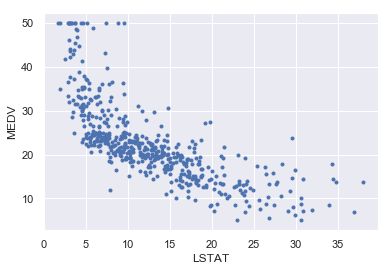

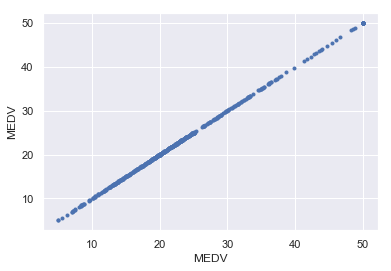

In [78]:
for col in df.columns:
    plt.figure()
    plt.plot(df[col], df.MEDV, '.')
    plt.xlabel(col)
    plt.ylabel('MEDV')    

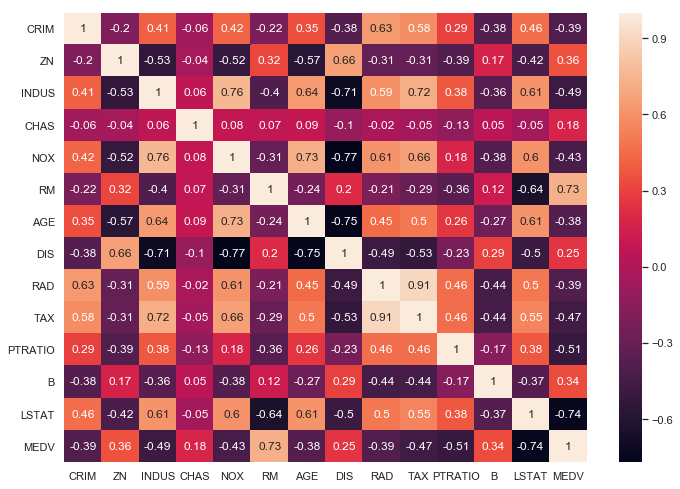

In [80]:
corr = df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data = corr, annot = True)

##### By looking at the correlation between MEDV and other features i.e. last column of above heatmap, we can find that RM and LSTAT are strongly correlated with MEDV.

## Fitting Linear Model, by keeping outliers as it is.

In [87]:
X = df[['RM', 'LSTAT']]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [91]:
lr_with_outlier = LinearRegression()
lr_with_outlier.fit(X_train, y_train)
lr_with_outlier.coef_

array([ 5.4342561 , -0.61241174])

In [102]:
r2score = r2_score(y_test, lr_with_outlier.predict(X_test))
print('R2 Score with outlier = ', r2score)

mse = mean_squared_error(y_test, lr_with_outlier.predict(X_test))
print('Root Mean Squared Error with outlier = ', mse ** 0.5)

R2 Score with outlier =  0.7236203580746439
Root Mean Squared Error with outlier =  4.824013069501254


## By looking at above scatter plot between MEDV vs RM, we can find three outliers, two are at RM value less than 4 and the other one is at somewhere RM value greater than 8.

### Let first remove two outliers, which are less than 4

In [94]:
mask1 = (df.RM < 4).apply(lambda x: not x)
df = df[mask1]

X = df[['RM', 'LSTAT']]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [96]:
lr_one_outlier = LinearRegression()
lr_one_outlier.fit(X_train, y_train)
lr_one_outlier.coef_

array([ 6.0008491 , -0.56941957])

In [97]:
r2score = r2_score(y_test, lr_one_outlier.predict(X_test))
print('R2 Score with one outlier = ', r2score)

mse = mean_squared_error(y_test, lr_one_outlier.predict(X_test))
print('Root Mean Squared Error with one outlier = ', mse ** 0.5)

R2 Score with one outlier =  0.6157203063157775
Root Mean Squared Error with one outlier =  5.624230783394955


### Now removing the last outlier.

In [98]:
mask2 = (df.RM > 8.75).apply(lambda x: not x)
df = df[mask2]

X = df[['RM', 'LSTAT']]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [99]:
lr_no_outlier = LinearRegression()
lr_no_outlier.fit(X_train, y_train)
lr_no_outlier.coef_

array([ 5.89867087, -0.58014749])

In [101]:
r2score = r2_score(y_test, lr_no_outlier.predict(X_test))
print('R2 Score with one outlier = ', r2score)

mse = mean_squared_error(y_test, lr_no_outlier.predict(X_test))
print('Root Mean Squared Error with one outlier = ', mse ** 0.5)

R2 Score with one outlier =  0.7230677701577137
Root Mean Squared Error with one outlier =  4.8288331789215055


### We can see that r2 score increased from 0.46 which is quite low to 0.72 which is quite good.